***What is text processing?***

"To preprocess your text simply means to bring your text into a form that is *predictable* and *analyzable* for your task. One task’s ideal preprocessing can become another task’s worst nightmare. So take note: text preprocessing is not directly transferable from task to task.", [1].

***Fist step: Tokenization***

A *token:* An instance of a sequence of characters



***Types of text preprocessing techniques***

- *Lowercasing* : One of the simple and effective ways to preprocess text is lowercasing. However, it may not be usefull for all the NLP tasks. E.g., it is useful in IR but for sentiment analysis, MT, Information extraction, Case is helpful as US versus us is important.

- *Stemming*: Reduce terms to their roots.

- *Lemmatization* : Lemmatization on the surface is very similar to stemming. However, in lematization, the goal is to remove inflections and map a word to its root form.

- *Stopword Removal*: The words that are commonly used in a language is called stop words. For example, "the" is one of the most commen words in english that we call it stop word. To focus on the important words, we should eliminate stop words as they have low information.

- *Normalization*: The process of transforming a text into an standard form is called text normalization. For example, the word “gooood” and “gud” can be transformed to “good”. This step is important in the case that you are using noisy texts such as social media comments and text massages that have abbreviations, misspellings or use of out-of-vocabulary words (oov). Some steps for normalizing text: 
  - Converting all letters to lower or upper case
  - Converting numbers into words or removing numbers
  - Removing punctuations, accent marks and other diacritics
  - Removing white spaces
  - Removing stop words, sparse terms, and particular words

- *Noise Removal*: Some times your text has some extra characters or digits that can affect your analysis. As an example, we can point to HTML tags. This step is one of the important steps which is domain dependent. Forexample, when you are using Tweets, some noises like hashtags are important in your analysis.





***Some useful packages in NLP***
1. [Natural Language Toolkit (NLTK)](https://www.nltk.org/data.html)
2. [TextBlob](https://textblob.readthedocs.io/en/dev/)
3. [Gensim](https://pypi.org/project/gensim/)
4. [SpaCy](https://spacy.io/usage)

Now lets see some implementations.

***Tokenizer:***

In [1]:
import nltk

In [2]:
from nltk import word_tokenize
sentence = "Hello. My name is Faeze. We are going to see how this sentence is going to be tokenized. WoW:)"

# Toksnize sentences with considering punctuations
tokenized_sentence = word_tokenize(sentence)
tokenized_sentence

['Hello',
 '.',
 'My',
 'name',
 'is',
 'Faeze',
 '.',
 'We',
 'are',
 'going',
 'to',
 'see',
 'how',
 'this',
 'sentence',
 'is',
 'going',
 'to',
 'be',
 'tokenized',
 '.',
 'WoW',
 ':',
 ')']

A ***RegexpTokenizer*** splits a string into substrings using a regular expression.

In [3]:
from nltk.tokenize import RegexpTokenizer

# Toksnize sentences and eliminating punctuations
tokenizer = RegexpTokenizer(r'\w+')
r_tokenized_sentence = tokenizer.tokenize(sentence)
r_tokenized_sentence

['Hello',
 'My',
 'name',
 'is',
 'Faeze',
 'We',
 'are',
 'going',
 'to',
 'see',
 'how',
 'this',
 'sentence',
 'is',
 'going',
 'to',
 'be',
 'tokenized',
 'WoW']

***Lower Case:***

In [4]:
lower_words = [w.lower() for w in r_tokenized_sentence if w.isalpha]
lower_words

['hello',
 'my',
 'name',
 'is',
 'faeze',
 'we',
 'are',
 'going',
 'to',
 'see',
 'how',
 'this',
 'sentence',
 'is',
 'going',
 'to',
 'be',
 'tokenized',
 'wow']

***Stemmer:***

In [5]:
# There are different algorithms for stemmer
# Here we used porter stemmer
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

# The words that we are going to stem them
words = ["Learn", "Learning", "Learned", ]

for w in words:
    print(w, " : ", ps.stem(w)) 

Learn  :  learn
Learning  :  learn
Learned  :  learn


In [6]:
ps.stem("sutudent")

'sutud'

In [7]:
words_2 = ["program", "programs", "programer", "programing", "programers", "programize"] 

for w in words_2:
    print(w, " : ", ps.stem(w)) 


program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program
programize  :  program


***Lemmatizer:***

In [8]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 

# a denotes adjective and v denotes verb in "pos" (pos stands for part of speech) 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 
print("gooooood :", lemmatizer.lemmatize("good", pos ="a")) 
print("better :", lemmatizer.lemmatize("worst", pos ="a")) 
print(lemmatizer.lemmatize("gave" , 'v'))

rocks : rock
corpora : corpus
better : good
gooooood : good
better : bad
give


In [9]:
# Lemmatization of some plurals
print("People: ", lemmatizer.lemmatize("People")) 
print("buses :", lemmatizer.lemmatize("buses")) 
print("leaves :", lemmatizer.lemmatize("leaves")) 
#axis
print("axes :", lemmatizer.lemmatize("axes")) 

People:  People
buses : bus
leaves : leaf
axes : ax


***What is the difference of stemmer and lemmatizer?***

"Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster." [3]
"Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun." [4]

Example of their different results:

In [10]:
from prettytable import PrettyTable

t = PrettyTable(['word', 'stem' , 'lemma'])
t.add_row(['women', ps.stem("women"), lemmatizer.lemmatize("women") ])
t.add_row(['corpora', ps.stem("corpora"), lemmatizer.lemmatize("corpora") ])
t.add_row(['Programmer', ps.stem("Programmer"), lemmatizer.lemmatize("Programmer") ])
t.add_row(['thought', ps.stem("thought"), lemmatizer.lemmatize("thought", 'v') ])
t.add_row(['taught', ps.stem("taught"), lemmatizer.lemmatize("taught" , 'v') ])

print(t)

+------------+----------+------------+
|    word    |   stem   |   lemma    |
+------------+----------+------------+
|   women    |  women   |   woman    |
|  corpora   | corpora  |   corpus   |
| Programmer | programm | Programmer |
|  thought   | thought  |   think    |
|   taught   |  taught  |   teach    |
+------------+----------+------------+


***Stopword Removal:***

In [19]:
from nltk.corpus import stopwords 

raw_text = "The most common stop word is the or The. Let's see how stop words are going to be eliminated."

# Set of english stop words
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(raw_text) 

filtered_sentence = [w for w in word_tokens if not w in stop_words] 

print(word_tokens) 
print(filtered_sentence) 

['The', 'most', 'common', 'stop', 'word', 'is', 'the', 'or', 'The', '.', 'Let', "'s", 'see', 'how', 'stop', 'words', 'are', 'going', 'to', 'be', 'eliminated', '.']
['The', 'common', 'stop', 'word', 'The', '.', 'Let', "'s", 'see', 'stop', 'words', 'going', 'eliminated', '.']


***Normalization:***

Reading a text file and eliminating tabs and spaces and etc.

In [21]:
# re stands for Regular expression operations
import re

input_string = 'We are going to remove numbers like: 1, 2, 3, 4, 55, 555 and etc. \
 \n Then, we will see the code for eliminating white \t spaces, and tabs and newlines. :)'

Remove *Numbers*

In [22]:
print("Input string:\n\n",input_string, "\n \n")

result = re.sub(r'[\d]+', '', input_string)

print("Output string:")
result

Input string:

 We are going to remove numbers like: 1, 2, 3, 4, 55, 555 and etc.  
 Then, we will see the code for eliminating white 	 spaces, and tabs and newlines. :) 
 

Output string:


'We are going to remove numbers like: , , , , ,  and etc.  \n Then, we will see the code for eliminating white \t spaces, and tabs and newlines. :)'

Remove *Tabs*

In [14]:
result = re.sub(r"[\t]*", "", result)
result

'We are going to remove numbers like: , , , , ,  and etc.  \n Then, we will see the code for eliminating white  spaces, and tabs and newlines. :)'

Remove *New lines*

In [15]:
result = re.sub(r"[\n]*", "", result)
result

'We are going to remove numbers like: , , , , ,  and etc.   Then, we will see the code for eliminating white  spaces, and tabs and newlines. :)'

Remove *Spaces*

In [23]:
result = re.sub(r"[\s]+", "-+", result)
result

'We-+are-+going-+to-+remove-+numbers-+like:-+,-+,-+,-+,-+,-+and-+etc.-+Then,-+we-+will-+see-+the-+code-+for-+eliminating-+white-+spaces,-+and-+tabs-+and-+newlines.-+:)'

Remove *Chrarcters*

In [17]:
result = re.sub(r'\,', "!", result)
result

'-+W-+e-+-+a-+r-+e-+-+g-+o-+i-+n-+g-+-+t-+o-+-+r-+e-+m-+o-+v-+e-+-+n-+u-+m-+b-+e-+r-+s-+-+l-+i-+k-+e-+:-+-+!-+-+!-+-+!-+-+!-+-+!-+-+a-+n-+d-+-+e-+t-+c-+.-+-+T-+h-+e-+n-+!-+-+w-+e-+-+w-+i-+l-+l-+-+s-+e-+e-+-+t-+h-+e-+-+c-+o-+d-+e-+-+f-+o-+r-+-+e-+l-+i-+m-+i-+n-+a-+t-+i-+n-+g-+-+w-+h-+i-+t-+e-+-+s-+p-+a-+c-+e-+s-+!-+-+a-+n-+d-+-+t-+a-+b-+s-+-+a-+n-+d-+-+n-+e-+w-+l-+i-+n-+e-+s-+.-+-+:-+)-+'

In [24]:
result = re.sub(r'\-', "!", result)
result

'We!+are!+going!+to!+remove!+numbers!+like:!+,!+,!+,!+,!+,!+and!+etc.!+Then,!+we!+will!+see!+the!+code!+for!+eliminating!+white!+spaces,!+and!+tabs!+and!+newlines.!+:)'

You can also use *replace function* instead of sub

In [25]:
result = result.replace('+', ' ')
result

'We! are! going! to! remove! numbers! like:! ,! ,! ,! ,! ,! and! etc.! Then,! we! will! see! the! code! for! eliminating! white! spaces,! and! tabs! and! newlines.! :)'

In [26]:
result = result.replace('n', 'a')
result

'We! are! goiag! to! remove! aumbers! like:! ,! ,! ,! ,! ,! aad! etc.! Thea,! we! will! see! the! code! for! elimiaatiag! white! spaces,! aad! tabs! aad! aewliaes.! :)'

Remove *punctuations*

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
input_string = " @test -- hi --- {ohhhh} isn't this fun?"
print("Input string is :\n \n", input_string)

result = re.sub('[%s]' % re.escape(string.punctuation), '', input_string)

print("\n \n Out put stritng:")
result

Input string is :
 
  @test -- hi --- {ohhhh} isn't this fun?

 
 Out put stritng:


' test  hi  ohhhh isnt this fun'

If you want to *remove spaces* and make a *list*, you can use split() funciton.

In [29]:
example = " H e l l o"
example.split()

['H', 'e', 'l', 'l', 'o']

In [33]:
example = " Hello. My name is Faeze."
example = re.sub('[%s]' % re.escape(string.punctuation), '', example)
example.split()

['Hello', 'My', 'name', 'is', 'Faeze']

***Word Embedding:***

The goal of word embedding is mapping words to vectors of real numbers in vector space with several dimentions. There are a lot of methods that can be used to achieve this goal. Methods like neural networks, co-occurrence matrix, etc.

***Word2Vec:***

We use Word2Vec to generate word embeddings. Word2Vec is neural network that has one input layer, one hidden layer and one output layer! It utilizes two different architecture. One of them is CBOW (Continuous Bag of Words) architecture and the other one is Skip Gram. 

**Difference of *CBOW* and *Skip Gram* architecture:**

![title](Word2vec.png)
"The CBOW architecture predicts the current word based on the context, and the Skip-gram predicts surrounding words given the current word" [7]

Some applications of *Word Embedding*:
- Sentiment Analysis
- Information Retrieval
- Question Answering

In [34]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [35]:
corpus = nltk.corpus.brown.sents(categories = 'reviews')
corpus

[['It', 'is', 'not', 'news', 'that', 'Nathan', 'Milstein', 'is', 'a', 'wizard', 'of', 'the', 'violin', '.'], ['Certainly', 'not', 'in', 'Orchestra', 'Hall', 'where', 'he', 'has', 'played', 'countless', 'recitals', ',', 'and', 'where', 'Thursday', 'night', 'he', 'celebrated', 'his', '20th', 'season', 'with', 'the', 'Chicago', 'Symphony', 'Orchestra', ',', 'playing', 'the', 'Brahms', 'Concerto', 'with', 'his', 'own', 'slashing', ',', 'demon-ridden', 'cadenza', 'melting', 'into', 'the', 'high', ',', 'pale', ',', 'pure', 'and', 'lovely', 'song', 'with', 'which', 'a', 'violinist', 'unlocks', 'the', 'heart', 'of', 'the', 'music', ',', 'or', 'forever', 'finds', 'it', 'closed', '.'], ...]

In [36]:
import gensim

# Continuous Bag of Words
CBOW_model = gensim.models.Word2Vec(corpus, min_count = 1, size = 200, window = 5) 

# Skip Gram
SG_model = gensim.models.Word2Vec(corpus, min_count = 1, size = 200, window = 3, sg = 1) 

In [37]:
t1 = PrettyTable([ '', 'It - was', 'It - celebrated'])


t1.add_row([ 'CBOW' , CBOW_model.similarity('It', 'was'), CBOW_model.similarity('It', 'celebrated')])

t1.add_row([ 'SG' , SG_model.similarity('It', 'was'), SG_model.similarity('It', 'celebrated')])

print(t1)

print("\n \n \n \n")

+------+------------+-----------------+
|      |  It - was  | It - celebrated |
+------+------------+-----------------+
| CBOW | 0.9998888  |    0.9739053    |
|  SG  | 0.99965155 |    0.9983361    |
+------+------------+-----------------+

 
 
 



/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [38]:
t2 = PrettyTable([ '', 'Symphony - night', 'Symphony - 20th' ])


t2.add_row([ 'CBOW' , CBOW_model.similarity('Symphony', 'night'), CBOW_model.similarity('Symphony', '20th')])

t2.add_row([ 'SG' , SG_model.similarity('Symphony', 'night'), SG_model.similarity('Symphony', '20th')])

print(t2)

print("\n \n \n \n")

+------+------------------+-----------------+
|      | Symphony - night | Symphony - 20th |
+------+------------------+-----------------+
| CBOW |    0.99418133    |    0.97992384   |
|  SG  |    0.9994167     |    0.9982714    |
+------+------------------+-----------------+

 
 
 



/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [39]:
CBOW_model.most_similar('It')

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('on', 0.9999086260795593),
 ('.', 0.9999019503593445),
 ('of', 0.9999017119407654),
 ('by', 0.9999008178710938),
 ('as', 0.9999006986618042),
 ('in', 0.9998999834060669),
 ('from', 0.9998982548713684),
 ('and', 0.9998961687088013),
 ('that', 0.9998956322669983),
 ('who', 0.9998955726623535)]

In [40]:
CBOW_model.most_similar('Symphony')

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('His', 0.9945395588874817),
 ('our', 0.9944911599159241),
 ('himself', 0.9944300651550293),
 ('human', 0.9944255948066711),
 ('after', 0.9944252967834473),
 ('It', 0.9944251179695129),
 ('first', 0.9944154620170593),
 ('song', 0.9943915605545044),
 ('she', 0.9943856596946716),
 ('With', 0.9943814277648926)]

What is the ***embedding*** of word 'It' based on our model ?

In [41]:
CBOW_model['It']

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.24743894e-01,  2.07797721e-01,  5.95530495e-02, -1.16420746e-01,
        4.32410687e-02, -5.96250519e-02,  7.96054900e-02, -2.41751969e-01,
        1.62809223e-01,  6.45110290e-03, -4.36255895e-02,  5.90964817e-02,
       -5.98886795e-03,  1.62941307e-01, -4.94224392e-02,  1.13689236e-01,
        6.89013302e-02,  6.51603416e-02,  9.14195403e-02,  4.56631146e-02,
        1.31911755e-01,  8.11512098e-02, -1.51693180e-01,  9.02250409e-02,
        7.43928105e-02,  5.61595932e-02, -6.30367771e-02, -1.11418344e-01,
       -1.73453614e-01,  7.83239007e-02,  7.65234306e-02,  3.57223116e-02,
        1.78547408e-02,  3.46356407e-02,  6.18971139e-02,  1.49158686e-02,
       -1.53755797e-02, -5.46391867e-02, -1.18687220e-01, -7.34152505e-03,
        1.16404958e-01,  1.75982937e-02,  8.78590420e-02, -1.64501548e-01,
       -4.23711948e-02,  1.89649425e-02, -5.73650235e-03,  6.06378578e-02,
       -4.30750102e-02, -2.92601958e-02, -1.17196523e-01,  9.31545272e-02,
        1.07599437e-01, -

In [42]:
CBOW_model['Symphony']

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01641025,  0.02291085,  0.00895062, -0.01283675,  0.00463731,
       -0.00803645,  0.00890611, -0.02799823,  0.01823712,  0.00027196,
       -0.00300585,  0.00883133,  0.0001528 ,  0.0179031 , -0.00583059,
        0.01471104,  0.00939721,  0.00927847,  0.01130408,  0.00580558,
        0.01506653,  0.0086995 , -0.02006922,  0.01265238,  0.00764072,
        0.00789726, -0.00694829, -0.01227134, -0.0225728 ,  0.01235052,
        0.0110905 ,  0.00538422,  0.00261197,  0.00490601,  0.00673096,
        0.00329447, -0.00303759, -0.00796125, -0.01517226, -0.00010887,
        0.01610819,  0.00263673,  0.00952934, -0.01796229, -0.00422906,
        0.00419203, -0.00157145,  0.00636189, -0.00328067, -0.00167024,
       -0.0135732 ,  0.01284044,  0.01301415, -0.00771199,  0.01430033,
        0.00986231, -0.0081047 ,  0.01671319,  0.00877378, -0.01474379,
       -0.02147958,  0.00411567,  0.00356936,  0.02029979, -0.0025575 ,
       -0.01849453, -0.00385631, -0.0084079 ,  0.01988575, -0.02

In [43]:
len(CBOW_model['Symphony'])

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

In [44]:
len(SG_model['Symphony'])

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

One way to find the similarity between two vectors is ***dot product***. Therefore, we can calculate the dot product between the vectors correspond to their words, to find the similarity between the words!

In [45]:
import numpy as np

In [46]:
t3 = PrettyTable([ '', 'It - was', 'It - Symphony'])


t3.add_row([ 'CBOW' , np.dot(CBOW_model['It'] , CBOW_model['was']) , np.dot(CBOW_model['It'] , CBOW_model['Symphony'])  ])

t3.add_row([ 'SG' , np.dot(SG_model['It'] , SG_model['was']), np.dot(SG_model['It'] , SG_model['Symphony']) ])

print(t3)

print("\n \n \n \n")

+------+-----------+---------------+
|      |  It - was | It - Symphony |
+------+-----------+---------------+
| CBOW | 6.7569036 |   0.28053296  |
|  SG  |  4.099103 |   1.2956661   |
+------+-----------+---------------+

 
 
 



/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


You can check out [this site](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) for *visualization*.

In [47]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


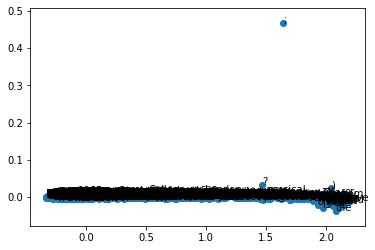

In [48]:
X = SG_model[SG_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(SG_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


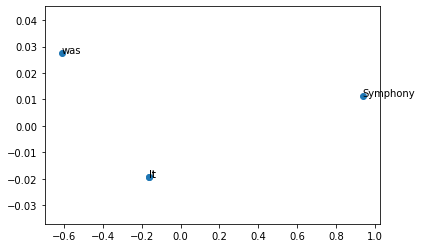

In [49]:
X = SG_model[['It' , 'was', 'It' ,'Symphony']]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = ['It' , 'was', 'It' ,'Symphony']
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

If you are using raw text instead of nltk corpuses, you can **preprocess your data** to be ready as an **input to the word2vec** like below:

In [50]:
from nltk.tokenize import sent_tokenize, word_tokenize , RegexpTokenizer

In [51]:
input_string = " Hello. \n My name is Faeze. ;) I am a master student of AI."

# normalzie
input_string = input_string.replace("\n", " ") 
  
print(" This is the input string:" , input_string)

data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(input_string): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i):
        temp.append(j.lower()) 
  
    data.append(temp) 

print(" And this is our input for word2vec:", data)

 This is the input string:  Hello.   My name is Faeze. ;) I am a master student of AI.
 And this is our input for word2vec: [['hello', '.'], ['my', 'name', 'is', 'faeze', '.'], [';', ')', 'i', 'am', 'a', 'master', 'student', 'of', 'ai', '.']]


What will happen if you remove punctuations ***before*** the loop?

In [52]:
input_string = " Hello. \n My name is Faeze. ;) I am a master student of AI."

# normalzie
input_string = re.sub('[%s]' % re.escape(string.punctuation), '', input_string)
input_string = input_string.replace("\n", " ") 
  
print(" This is the input string:" , input_string)

data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(input_string): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i):
        temp.append(j.lower()) 
  
    data.append(temp) 

print(" And this is our input for word2vec:", data)

 This is the input string:  Hello   My name is Faeze  I am a master student of AI
 And this is our input for word2vec: [['hello', 'my', 'name', 'is', 'faeze', 'i', 'am', 'a', 'master', 'student', 'of', 'ai']]


How to ***get rid of the punctuations*** wihtout changing the form of output?!

In [53]:
input_string = " Hello. \n My name is Faeze. ;) I am a master student of AI."

# normalzie
input_string = input_string.replace("\n", " ") 
  
print(" This is the input string:" , input_string)

data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(input_string): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i):
      # not adding punctuations in temp
      if j not in string.punctuation:
        temp.append(j.lower()) 
  
    data.append(temp) 

print(" And this is our input for word2vec:", data)

 This is the input string:  Hello.   My name is Faeze. ;) I am a master student of AI.
 And this is our input for word2vec: [['hello'], ['my', 'name', 'is', 'faeze'], ['i', 'am', 'a', 'master', 'student', 'of', 'ai']]


Now, lets read a file in the folder:

In [54]:
with open('test_dataset') as file:
    for line in file:
        print(line)

Hello.

We are going to see the results of normalization with considering this generated text set.

Lets check our models on this dataset. What are the similrity for different words based on this small dataset? It is intresting. Lets watch. It is good to know... 



In [55]:
file = open('test_dataset', 'r').read()

In [56]:
file

'Hello.\nWe are going to see the results of normalization with considering this generated text set.\nLets check our models on this dataset. What are the similrity for different words based on this small dataset? It is intresting. Lets watch. It is good to know... \n'

In [57]:
# normalzie
file = file.replace("\n", " ") 
  
print(" This is the input string:" , file)

data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(file): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i):
      # not adding punctuations in temp
      if j not in string.punctuation:
        temp.append(j.lower()) 
  
    data.append(temp) 

print(" And this is our input for word2vec:", data)

 This is the input string: Hello. We are going to see the results of normalization with considering this generated text set. Lets check our models on this dataset. What are the similrity for different words based on this small dataset? It is intresting. Lets watch. It is good to know...  
 And this is our input for word2vec: [['hello'], ['we', 'are', 'going', 'to', 'see', 'the', 'results', 'of', 'normalization', 'with', 'considering', 'this', 'generated', 'text', 'set'], ['lets', 'check', 'our', 'models', 'on', 'this', 'dataset'], ['what', 'are', 'the', 'similrity', 'for', 'different', 'words', 'based', 'on', 'this', 'small', 'dataset'], ['it', 'is', 'intresting'], ['lets', 'watch'], ['it', 'is', 'good', 'to', 'know', '...']]


In [58]:
CBOW_model = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

SG_model = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 3, sg = 1) 

In [59]:
t5 = PrettyTable([ '', 'It - is', 'It - based'])


t5.add_row([ 'CBOW' , CBOW_model.similarity('it', 'is'), CBOW_model.similarity('it', 'based')])

t5.add_row([ 'SG' , SG_model.similarity('it', 'is'), SG_model.similarity('it', 'based')])

print(t5)

print("\n \n \n \n")

+------+-------------+-------------+
|      |   It - is   |  It - based |
+------+-------------+-------------+
| CBOW | -0.02925396 | 0.008717562 |
|  SG  | -0.02934312 | 0.008675586 |
+------+-------------+-------------+

 
 
 



/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


*Visualization*

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


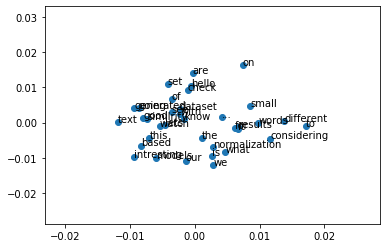

In [60]:
X = SG_model[SG_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(SG_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

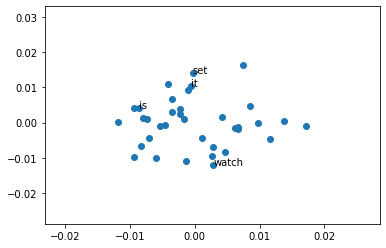

In [61]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = ['it', 'watch', 'set' , 'is']
for i, word in enumerate(words):
    pyplot.annotate(word, xy=data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAD4CAYAAADhNOGaAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdeVhVVdvA4d9iHgVUFMEBNAdkHp1CccQccDZNeyVTXy1zKlPfysys7MPM1NIsFStnSzM1NUUTxwAFpzQHMEVFREFQZtb3B3BiVBIUkHVfF1ecffbZe50T7ufsNTyPkFKiKIqiVF9aFd0ARVEUpWKpQKAoilLNqUCgKIpSzalAoCiKUs2pQKAoilLN6VR0Ax5H7dq1pa2tbUU3Q1EUpUoJDw+/LaW0LLy9SgYCW1tbwsLCKroZiqIoVYoQ4kpx21XXkKIoSjWnAoGiKEo1pwKBoihKNacCgaIoSjWnAoGiKEo1pwKBoihKNVcugUAI0V0IcV4IcVEIMb2Y5/WFEOtznz8mhLDN3e4thIjI/YkUQvQrj/YoiqIopVfmQCCE0Aa+BF4AWgJDhRAtC+32KnBXSvkc8Dnwae7204CnlNIV6A58LYSokmsbFEVRqqryuCPwBi5KKS9LKdOBdUCfQvv0AVbl/r4J6CyEEFLKB1LKzNztBoAqjqAoivKUlUcgsAGu5nt8LXdbsfvkXvgTgVoAQohWQogzwClgbL7AUIAQYowQIkwIERYXF1cOzVYURVGgEgwWSymPSSkdAC9ghhDCoIT9lkkpPaWUnpaWRVJlKIqiKI+pPAJBDNAg3+P6uduK3Sd3DMAMiM+/g5TyTyAZcCyHNimKoiilVB6BIBRoKoSwE0LoAUOArYX22QqMyP19IBAspZS5r9EBEEI0AloA0eXQJkVRFKWUyjxDR0qZKYQYD+wCtIEVUsozQojZQJiUciuwHPheCHERuENOsAB4HpguhMgAsoHXpJS3y9omRVEUpfSElFVvoo6np6dUaagVRVH+HSFEuJTSs/D2Ch8sVhRFUSqWCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVnAoEiqIo1ZwKBIqiKNWcCgSKoijVXLkEAiFEdyHEeSHERSHE9GKe1xdCrM99/pgQwjZ3e1chRLgQ4lTufzuVR3sURVGU0itzIBBCaANfAi8ALYGhQoiWhXZ7FbgrpXwO+Bz4NHf7baC3lNIJGAF8X9b2KIqiKP9OedwReAMXpZSXpZTpwDqgT6F9+gCrcn/fBHQWQggp5Qkp5fXc7WcAQyGEfjm0SVEURSml8ggENsDVfI+v5W4rdh8pZSaQCNQqtM8A4LiUMq24kwghxgghwoQQYXFxceXQbEVRFAUqyWCxEMKBnO6i/5a0j5RymZTSU0rpaWlp+fQapyiK8owrj0AQAzTI97h+7rZi9xFC6ABmQHzu4/rAZuA/UspL5dAeRVEU5V8oj0AQCjQVQtgJIfSAIcDWQvtsJWcwGGAgECyllEIIc2A7MF1Keagc2qIoiqL8S2UOBLl9/uOBXcCfwAYp5RkhxGwhhH/ubsuBWkKIi8AUIG+K6XjgOWCmECIi96dOWdukKIqilJ6QUlZ0G/41T09PGRYWVtHNUBRFqVKEEOFSSs/C2yvFYLGiKIpScVQgUBRFqeZUIFCUZ8j8+fNxdHTE0dGRBQsWEB0djb29PaNHj8bBwYFu3bqRkpJS0c1UKhkVCBTlGREeHs7KlSs5duwYR48e5ZtvvuHu3btcuHCB119/nTNnzmBubs6PP/5Y0U1VKhkVCBSlittyIoZ2c4PpNu1rEuq48ttfCZiYmNC/f39CQkKws7PD1dUVAA8PD6Kjoyu2wUqlo1PRDVAU5fFtORHDjJ9OkZKRhQSSUjOZ8dOpAvvo6/+TvktbW1t1DSlFqDsCRanCAnedJyUjCwD9+g48uHCU+w/uM/eXCDZv3oyPj08Ft1CpCtQdgaJUYdcT/vl2r2/1HCaOnbn53RRuAv/3zmQsLCwqrnFKlaEWlClKFdZubjAxCUW7emzMDTk0XdV5UgpSC8oUpQyysrIqugnFmurXHENd7QLbDHW1merXvIJapFRFKhAoCtC3b188PDxwcHBg2bJlAJiYmPDmm2/i4uLCkSNHCA8Pp0OHDnh4eODn58eNGzcquNXQ182GT/o7YWNuiCDnTuCT/k70dStcEkRRSqa6hhQFuHPnDjVr1iQlJQUvLy9+//13ateuzfr16xk8eDAZGRl06NCBn3/+GUtLS9avX8+uXbtYsWJFRTddUUqtpK4hNVisVFtbTsQQuOs81xNSyAzbgM7fodQw1OXq1atcuHABbW1tBgwYAMD58+c5ffo0Xbt2BXK6iurVq1eRzVeUcqMCgVIt5Z9/n/r3SRLOhdFo+Md88KIXCyYPIzU1FQMDA7S1c/rfpZQ4ODhw5MiRCm65opQ/NUagVEv5599npz1Ay8CYNHT54PvfOHr0aJH9mzdvTlxcnCYQZGRkcObMmafaZkV5UlQgUKql/PPvDe08kNnZxHwzlvPbvqZ169ZF9tfT02PTpk1MmzYNFxcXXF1dOXz48NNssqI8MaprSKmWrM0NNfPvhY4udQd/AOTMutmfO/8+OTm5wGtcXV05cODA022oojwF6o5AqZbU/HtF+Ye6I1Cqpbx59nmzhqzNDZnq11zNv1eqJRUIlGdGUFAQ3bp1w9raulT793WzURd+RUF1DSnPkKCgIK5fv17RzVCUKkcFAqVSu3//Pj179sTFxQVHR0fWr19fbKqHTZs2ERYWxrBhw3B1dS11zv3o6GgcHR1L3Z5Zs2Yxb948AAICAti0adNjvS9FqUxU15BSqe3cuRNra2u2b98OQGJiIi+88EKBVA/vvPMOK1asYPHixcybNw9PzyIr6BVFeQgVCJRKKS/9w5XL8dze9AvxGa8x+dWhWFhYlHuqh6ysLEaPHs3hw4exsbHh559/5vr167z++uvExcVhZGTEN998Q4sWLUo8xt69e3nrrbfIzMzEy8uLJUuWFKgMpiiVmeoaUiqdvPQPMQkp6NS0wfI/CziaYMLYSVP58ccfcXBwICIigoiICE6dOsXu3bvLdL7iiruPGTOGRYsWER4ezrx583jttddKfH1qaioBAQGsX7+eU6dOkZmZyZIlS8rUJkV5mtQdgVLp5E//kJkUj7ahKdotOpBtZsaxY4c0qR7atGlDRkYGf/31Fw4ODpiampKUlPTI4+dPNldTJqKnb8DFixdxdXXVFHc/fPgwgwYN0rwmLS2txOOdP38eOzs7Pv74Y3r16sWIESP48ssvmTRpUtk/DEV5CsolEAghugNfANrAt1LKuYWe1we+AzyAeOBFKWW0EKIWsAnwAoKklOPLoz1K1ZY//UNGXDS39q8EIRBaOnz/yxp0dHSYMGECiYmJZGZmMmnSJBwcHAgICGDs2LEYGhpy5MgRDA0Nixw7f7I5gNh7qaRlwR9R8Qwkp7h7bGws5ubmREREPK23rCgVqsz1CIQQ2sBfQFfgGhAKDJVSns23z2uAs5RyrBBiCNBPSvmiEMIYcAMcAcfSBgJVj+DZ9iTLL7abG8z5g9u498dmAHTMrUj9+xR13bthx03Onz9P586duXbtGpMnTyY6OpoNGzaQmJjI0KFDEUJgYmJCnTp1mDRpEjVq1KBt27YcPHgQT09PXnrpJbZt28aNGzeoV68ey5cv12QwVZSK9iTrEXgDF6WUl3NPtA7oA5zNt08fYFbu75uAxUIIIaW8DxwUQjxXDu1QnhFT/ZoX+NYO5Zf+IfrCORIPr8dqeCDaRmakx17i5t+nuHfnFgfPHmTatGksX76c8PBwBg0aRFRUFHXq1OGll14iLCwMS0tLatWqxbJly+jWrRsDBw6kU6dOnDhxgkGDBhEWFoaZmRmtW7dm2bJlCCHK3GZFedLKY7DYBria7/G13G3F7iOlzAQSgVr/5iRCiDFCiDAhRFhcXFwZmqtUdk+i/OKWEzG0mxtMyt8nMWrxPNpGZgDo1W2CUdPW2Li0R0tLi8DAQDIyMrCzs8PX1xdTU1P09fXZsmUL586d4/nnn6dRo0YMGjSIdevWMXDgQGrWrEnnzp3x9/fHwsKCNm3a8M0336ggoFQZVWawWEq5DFgGOV1DFdwc5Qkrz/QPhccFCtPWEvT1bKR5nNddKqVkxowZ/Pe//y2w/6JFi0o8l5eXF+Hh4ZrSl4pSFZTHHUEM0CDf4/q524rdRwihA5iRM2isKE9c/llIBg2deXDuIFkp9wCoo5eBRyMLvO2K3qD6+fmxYsUKTTrqmJgYbt26RadOndi4cSPx8Tl/wnfu3NG8pnv37kyfPp2ePXuWagaTolQG5XFHEAo0FULYkXPBHwK8VGifrcAI4AgwEAiWZR2lVpRSyj8LSc+yEWZtXiR2zXQQWvj26AA1jYp9Xbdu3fjzzz9p06YNACYmJvzwww84ODjwzjvv0KFDB7S1tXFzcyMoKEjzukGDBpGUlIS/vz87duwodvaSolQmZZ41BCCE6AEsIGf66Aop5UdCiNlAmJRyqxDCAPienBlCd4Ah+QaXo4EagB6QAHTLP+OoOGrWkPJvPMlZSIpSlZQ0a6hcVhZLKXdIKZtJKZtIKT/K3TZTSrk19/dUKeUgKeVzUkrvvCCQ+5ytlLKmlNJESln/UUFAUYqzcOFC7O3tGTZsWJHnVBEaRXm4KjNYrCgP89VXX7Fnzx7q169f5DlVhEZRHk4FAqXKmT9/PitWrABg1KhRnDt3jsuXL/PCCy8wcuRIJk+eXOQ1qgiNopRMBQKlSgkPD2flypUcO3YMKSWtWrXihx9+YOfOnezbt4/atWtXdBMVpcpR2UeVKiFvQVi3aV+TUMeV3/5KwMTEhP79+xMSElLRzVOUKk3dESiVXv4FYRJISs1kxk+nKrpZivLMUHcESqWXf0GYfn0HHlw4yv0H95n7SwSbN2/Gx8engluoKFWbCgRKpZd/QZi+1XOYOHbm5ndTOL7oNUaNGoWbm1sFtq56MzExAf597WelclFdQ0qlZ21uWGBBWA3vftTw7oeNuSGTJuUsCIuOjq6g1ilK1afuCJQnZubMmezZs6fMx5nq15yU41vJzkjVbCvNgrD9+/fTq1evMp//WXH//n169uyJi4sLjo6OrF+/HltbW2bMmIGrqyuenp4cP34cPz8/mjRpwtKlSwFITk6mc+fOuLu74+TkxM8//1zB70QpbyoQKE/M7Nmz6dKlS6n2lVKSnZ1d7HN93WyQp3dgZaT1r9NS//XXX8ybN6/E57ds2cLZs+W7mD06Opo1a9aU6zHLw86dO7G2tiYyMpLTp0/TvXt3ABo2bEhERAQ+Pj4EBASwadMmjh49yvvvvw+AgYEBmzdv5vjx4+zbt48333wTlSrs2aICgfJQH374Ic2bN+f5559n6NCh+Pn5YWdnh4WFBTVr1qRx48Zs3ryZ1q1bY2FhQZMmTfD29qZx48b4+vqyadMmACwsLLCxscHQ0JA6depw7tw5oqOjee6556hXrx6GhoYMHToUU1NTXF1dcXBw0FyIFi5cSMLtWFK2zMT22DwOTe+EUdwZ2rRpg7u7O4MGDdJkCN25cyctWrTA3d2dn3766ZHv71kPBHnTbu2mb+ejw8n8vH0n06ZNIyQkBDOznJoM/v7+ADg5OdGqVStMTU2xtLREX1+fhIQEpJT873//w9nZmS5duhATE0NsbGxFvi2lnKlAoJQoNDSUH3/8kcjISH799VcOHTrEqVOnsLW1JTg4mFq1atGrVy9efvllPv30U/r06YO+vj5t2rRh27ZtHD9+HIDdu3eTmZnJtGnTuH//PnXr1uXNN98E4NKlS/Tt25fU1FReeeUVkpOT2bNnDydPnuT333/n5MmTTJgwAWtra/bt28e+ffu4ffs2c+bMYc+ePRw/fhxPT0/mz59Pamoqo0ePpkePHiQnJ7NmzRru378PwDfffIOXlxcuLi4MGDCABw8ecPjwYbZu3crUqVNxdXXl0qVLxe4HsHHjRhwdHXFxcaF9+/YAZGVlMXXqVLy8vHB2dubrr78GYPr06YSEhODq6srnn3/+tP+3aeRNu41JSEECd3RrY/7SfNJMbXj33XeZPXs2APr6+gBoaWlpfs97nJmZyerVq4mLiyM8PJyIiAjq1q1LampqcadUqigVCJQC8n+DHPxBEM29O7Lzz3i6fxnKLcy4b1CHw0eO8Morr5CYmMiGDRtIS0ujQ4cOQE7Kh5CQEFq2bElKSs4A7+7du0lJSeHrr7/G3d2dhIQEoqKiANDT0+Ptt98GcnL5GxkZ0alTJ9zc3Dhz5kyx39aPHj3K2bNnadeuHa6urqxatYorV65w7tw5ateuzW+//UZERASLFy8mISEBgP79+xMaGkpkZCT29vYsX76ctm3b4u/vT2BgIBERETRp0qTY/SCnm2vXrl1ERkaydetWAJYvX46ZmRmhoaGEhobyzTffEBUVxdy5c/Hx8SEiIqLYdBdPS/5ptwCZSfGkoUOojiNTp07VBOpHSUxMpE6dOujq6rJv3z6uXLnypJqsVBA1a0jRKFzJ615KBr/9eZfjGyPJyM7pE07LzCZL14hZK7dz4PvPMDMz01wsIefCXpiUEjMzM37//Xdq165NWFgYb731FpDzrTNPVFQUqamp/PTTTzz33HMEBAQU+81TSknXrl1Zu3ZtgbYHrNjO6aib1PPowu7zdzEyMqJu3boAnD59mnfffZeEhASSk5Px8/Mr9jMoab927doREBDA4MGD6d+/P5AT4E6ePKnp/kpMTOTChQvFfgYV4Xqh1NsZcdHc2r+SG0LwQcNaLFmyhIEDBz7yOMOGDaN37944OTnh6elJixYtnlSTlQqiAoGiUfgbpH59e+7s+hLTVoOQ2VlkJsSCzEbbtA5TP1mMiNjG6NGjMTAw0KR5OHDggObuII+fnx+LFy8mOTmZ2rVrc+vWLdLT0wEwMjJiw4YNTJs2jZ07d5KdnU2NGjWIjY3l119/xdfXFwBTU1OSkpIwNDTkiy++4MCBAzRt2pQ5c+ZwKVmP2e9NIzsrk6x7t7gbd5MZP53C5PeF3Lx5kwULFnD79m3WrVtH3759cXZ25t69eyQkJHDu3DnNzKL9+/fTo0cPjhw5gouLC0FBQezfvx+ApUuXcuzYMbZv346Hhwfh4eFIKVm0aFGRoJL3mopWeNqtYWMPDBt7FKjDkH/abUBAAAEBAZrH+Z87cuRIsefIG5uxtbXl9OnT5dd45alSXUOKRuFvkPr1mmH4nDfXV4zn1sb30a/XFL26jcm6f5dLWxdx69YtPv/8czp37szUqVP5+eefiY6OZubMmQWO061bN4yNjenRowdOTk5Mnz6drKycgGNpacnu3btxdHTk+PHjGBgY0K5dO1566SXatWunOcaYMWPo3r07rVq1ws7Ojp07d2Jubs7s2bN5b9xQTNx7Y/3KIowdO3L/9F4uLXuNyMgIACZNmoSBgQHz5s0jIyODunXroqenR0JCAhcuXChQUjIzM5N69eqRkZHB6tWrNdsvXbpEq1atmD17NpaWlly9ehU/Pz+WLFlCRkYGkDND6f79+5qgVdFUHQaltMqlQtnTpiqUPRnFVfLKTk9BS8+Q7IxUYtdMx6LTaAwaOGBlJMjcOpNly5bh7u7+2OdMS0tDW1sbHR0djhw5wrhx44iIiCiy35YTMQTuOs+Vyxe5vXEmPfr0Z/KrQ7GwsMDZwxsdc6vcBmeTlXwHhCA7JQl9fT2klFhaWnLz5k3MzMzIyMigR48eAGzevBkhBGZmZsyfP58PPviAmJgYsrOzadiwIW3atCEoKIj+/ftz4cIFpJR07tyZBQsWIKXk3Xff5ZdfftGcY8uWLRgZGeHn50d8fDwBAQEVOk6Q97mpOgwKlFyhTAUCRaPwGAFA/C+BpN/+m+zMDEwcO5Eed4WsO1epbSh4fcyrzJgxo0znvHDhAoMHDyY7Oxs9PT2++uorvLy8HtqurJQksq4cx+LqAQb7v8C85eup9VKgZv+0mHMkHttE5s2/aOXSkrS0NA4dOsTHH3+MlZUVn3zyCWFhYSQnJ9OrVy9Nl8b+/fvp06cPZ86cwdramnbt2hEYGMjzzz9fpveoKJVFSYFAjREoGsVV8lrww+oi28rzW2XTpk05ceJEgW3R0dEFLtD5xy4yk+LRNjRFu0UHss3MOHbsECbyAZk3zqFTrwUyKxN09MiIi8K2YUMSExPp2LEjoaGh/Prrr6xYsYJPPvmkxPZ4e3trqpy5uroSHR2tAoHyzFOBQCmgpEpeZbnwjxo1iilTptCyZctS7X/y5Elu3LgBQFBQEKc2bqJm13HAPzNfEAKZnkrnYf3p+p9JTBs/CpmdhdDSwdTTH10zK9zb+hK2dyubNm3iyy+/xNTUFHt7+4eeO/88em1tbTIzMx/zXStK1aECgVJmH374IT/88AOWlpY0aNAADw8PunTpwtixY3nw4AFNmjShXr16AERERBTYvmLFCiwsLAgPD2fkyJFAzuBy3v4Axnr//JnmzXyR2VnUr2nC4umdaDc3GL16zTBs4oVxi5xv71nJ8WzZsIbtm1ZjZmZG27Zt8fX1RQihOVZlGdRVlIqmZg0pZVJ49XFoaCjLly+nTZs2xMbG8s4773D8+HFee+01ANzd3bG1tSUrK4uIiAjGjRuHr68vbdq0YciQIURGRnL16tUCi5bcGppjqKvN7e2fE79rMTe+m0LSgSA80iIZP348l08fJ+XiMe7uX8n1lW+QcfcG98/sJz0pnjZt2pCcnExWVhY+Pj5cvnyZ69evs3jxYkaPHk16ejr6+vp4e3trzrd27VqcnJxYu3YtGzZsAHJWFk+ZMgWAL774gsaNGwNw+fLlArObHiX/gr12c4PZciKmzP8PqrpZs2Yxb968AkkKQ0JCcHBwwNXVlZSUFKZOnYqDgwNTp059om1ZsGCBZjV5daICwTMqISGBr7766rFe+6hcOcWtPjYwMNB0vRgZGWFpaUlUVBTdu3fHysqKEydOkJiYiJSSESNGcObMGZo2bcqOHTvYuHEjtWrVYv369QB07dq1wPkaW5rwSX8njPS0yUqKx2P8YlYsWYR7I4uc5x3dMXyuFRa+r2D9yiJ0LeqhXaM2Lq9/hbGxMRs3bsTKyoqePXsyYMAAQkNDsbW1JSIignPnzpGYmEhsbCxNmjRh2bJlTJs2jeDgYGJjY0lNTWXLli34+Pho1kqEhIRQq1YtYmJiCAkJ0aSceJTCKR9iElKY8dMpFQxy5U9SuHr1ambMmEFERASGhoYsW7aMkydPEhgY+Iij5HjcLj0VCJRnypMKBIUvZokpGfz2ZyyuH+zGbvp2jl3P4NxfF0lISCiQ2Cy/vKyXzZo1w8TEBF1dXXR1dR9aU6Cvmw09nOqx5L3XOfy/rgXGLKb6NUdbSxTY39zFj5g/fsX27a0sX7OJ+6lp9OnTh9WrV+Pi4gJA586dMTMzw8DAgJYtW3LlyhVCQ0Px9fXF0tISHR0dhg0bxoEDB7CysiI5OZmkpCSuXr3KSy+9xIEDBwgJCSl1hbTCC/YAUjKyCNx1vlSvr4pKSgX+0Ucf0axZM55//nnOn895/3mZT7/99ls2bNjAe++9x7Bhw/D39yc5ORkPDw/Wr19PXFwcAwYMwMvLCy8vLw4dOgTk3Fm8/PLLtGvXjpdffrnEXFD79+/H19eXgQMH0qJFC4YNG4aUkoULF3L9+nU6duxIx44dn96HVAmoQPCMmj59OpcuXcLV1ZWpU6cSGBio+QeRl9UzNDQUZ2dnUlNTuX//Pg4ODpw+ffqhSdOKW318/8If3E26T1Z6CnejTmHk7o++kSlvvPEGs2fPJjY2Fnd3d8zMzNDS0uLgwYNATjqH5557DnNzc8zNzUlLSwN4aA0DY2PjItv6utng0ciCmsZ6CMDcUBdj+3Yk/PUHDy6FolWrESnCEAOLuppzw78fGG7bti0rV66kefPmmjuEI0eOlLprqPCCvdiN75OZFM+ZX77R5C/aunVrkQV5VUneQsGHCQ8PZ926dURERLBjxw5CQ0MLPD9q1ChNDqjVq1ezdetWDA0NiYiI4MUXX2TixIlMnjxZ0y05atQozWvPnj3Lnj17WLt2bYm5oABOnDjBggULOHv2LJcvX+bQoUNFkhtWJyoQPKPmzp1LkyZNiIiIoGvXrly4cIE//viDiIgIwsPDOXDgAF5eXvj7+/Puu+/y9ttvM3z4cBwdHR+aNO1Rq491LKzJ1jfFZvD7pKam8tlnn5GcnKz5x6qnp8fUqVNxdnbm5s2bmq6AlStXkp6ejqurK1JKTeqCkiQkJLB3717NY4dGdZnexZaouT0x1tchS+hiaOfOnd1fYdy8HWhpY/DC23z33XcP7fby9vbm999/5/bt22RlZbF27VpNygwfHx/mzZtH+/btcXNzY9++fejr6xd711Mca3PDAo/rDvoAHdNaOPQerUkF7e/vr8kK+rQFBgaycOFCACZPnkynTjlpKIKDgxk2bJhm7MTR0ZFp06ZpXmdiYsKbb76Ji4sLR44cKTYV+JYTMTiO+Ry9uo1p08mPazdiycrKokaNGpr3Xlp79uxh/PjxuLq64u/vz7179zR/L/7+/hga5nzOu3fv5rvvvsPV1ZVWrVoRHx/PhQsXgH+mCWtpaWmmCVdn5RIIhBDdhRDnhRAXhRDTi3leXwixPvf5Y0II23zPzcjdfl4IUXwmMKXU8vrvn/80mMu377PlRAy7d+9m9+7duLm54e7uzrlz5zT/IGbOnMlvv/1GWFiYJgvowxS+mAHU8O6PzZhl1Bk8m8y717kXuoWz6+diamrK3r17cXR0pEaNGkDON++jR49y8uRJhgwZgpGREQAeHh6ab31jx45FW1u7yHnymz9/foE7hyFDhhAYGIibm/b/MzQAACAASURBVBtXoi4DkJ2RRnZ6KvoNHACIfQDbtm3j888/5969e8Uet169esydO5eOHTvi4uKCh4cHffr0AXICwdWrV2nfvj3a2to0aNDgX60xqOwpH/KPg+QtuMvIyCAkJIRmzZppxk4iIiIIDQ1ly5YtQE7ls1atWhEZGYmnpyejR4/ml19+ITw8nJs3b3IzMZUZP53icvBaanYdh4lnf7SadWD3uTuP1c7s7GyOHj1KREQEERERxMTEkJmZSWhoaIE7xrxcUHn7RUVF0a1bN0BNEy6szNNHhRDawJdAV+AaECqE2CqlzJ8/+FXgrpTyOSHEEOBT4EUhREtgCOAAWAN7hBDNpJSPvr9Uiii8AjczK5sZP52iWWwSM2bM4L///W+R18THx2v+waemphbb9ZLfVL/mRVcf71xMRvzfyMwMTJy6YNZmcIHEZvmTsOX/pj9r1qwCx857ztfXFwMDAyCn3zguLg4vLy/S0tJo1KgRAwcO5LPPPiMrK4uDBw8ydepUpkyZQu3atbl37x53fv6IGp3HknkvDv16TdG1sMb61a+wNjfE3Ny8SFcE5ASIPEOHDmXo0KFF9mnSpEmByly7d+9+6GdVWHEL9io65UP+FBRWprpcDDmMvb09NjY2NGjQgIULFxISEkLv3r01YyeAZuykb9++aGtrM2DAAADOnTuHnZ0dTZs2BWD48OEEvP0xNTKy0K/fkrvB36LfwIGUi6EE7jxLtxY1+eWXX4r92yxJt27dWLRokWYGUUREhOb/a/6+/bxcUJ06dUJXV5e//voLG5uHf9Z5U4pr1679rz7Hqq481hF4AxellJcBhBDrgD5A/kDQB5iV+/smYLHImdDdB1gnpUwDooQQF3OPV3yqQ+Wh8vffCz1DstNTSMnI4qJuznz9YcOGYWJiQkxMDLq6utSpU4f//ve/fPjhh0RFRTFt2jQWL1780Pn1hS9m5ka66PZ9W5OmGv7dt9zAwED09fWZMGECkydPJjIykuDgYLKyshg2bBiJiYkcO3aMOnXqMGDAAMLDw5kwYQIZGRloaWlhYWFBYGAgo0eP5uLFi1haWtKkgTVRf/xERlwUBo1cublmOtlJt+kyehzQqWwfchmVtGCvtBYuXMiSJUtwd3cvkBRPSomUskBa70cp/MXhRlIGybpmZMbFM2jQIOLj49m4cSM3b97E1taW8PDwYo9jYGDw0Du41MxsagBmrQdh2MSLlEthZN2/S9i8Ebywq1mRlCKPsnDhQl5//XWcnZ3JzMykffv2JCQkcOfOHebPn6+pnrZjxw5u3bpFkyZNqFGjhiYX1MPkJTfMGyuoNvL+gB73BxgIfJvv8cvA4kL7nAbq53t8CagNLAaG59u+HBj4qHN6eHhIpSjbadtko3w/RvYdpG7thrKGd3+5YMEC6ejoKB0dHWXr1q3lxYsX5apVq2T//v2llFJmZmZKb29vuXfvXpmeni47duwonZ2d5fz58x953s3Hr8m2n+yVttO2ybaf7JWbj18rdZuPHDkiBw4cKKWU0t7VW5rUby4bvbVFCm0dOfZ/c+Vrr70mGzVqJJ2dnaWxsbGsX7++/Pbbb6WNjY1s3ry5lFLKW7duSUtLS9mwYUP5/vvvy/3798vNx6/J+p3/I/WtW8jWH/4qV+09KWvWrCnT09Mf45OtPJo3by6vXr0qpZTS3d1dNmvWTPbr10/a2NjIoKAg2bp1a+nm5iYHDhwo7969K6WUctq0adLe3l46OTnJN998U0op5YgRI2Szl2Zq/laEroFsNG2bNPXwl0JLW+7YsUNaW1tLLS0tWaNGDblkyRJZt25d6eDgIJ2dnaWJiYlcu3atlFJKY2NjTftSUlJkgwYN5MWLF6WUUg4ZMkRaNG8lG03bJq3HfPPP32aztrL58A/K7XOJioqSDg4OUkopN23aJLt06SIzMzPlzZs3ZYMGDeT169fL7VxVGRAmi7mmVpmVxUKIMcAYyCm2rRRVOP+8pX/OrbONuSETJ3Zi4sSJBfZv0qQJ//nPf4CcftJjx45pngsODi71eR/nW25el0RMfBI39x5i6pojXElIR7tuM9JuXkBmZ7Mr3hzTE9vIzs5GSomhoSGBgYEMGTJEM/MJciqWde3alcDAQLZv387EiROZMmUKrz5vh27HZrzzTs501U/q1CE2NlaTS6iqGTt2LJcvX+aFF14gICCAWrVqcfz4cdLT02nQoAHLly+nY8eOXL16VTOtdf/+/WzevJlz584hhNBUbAO4ez8do0Ln0KvXFBmeRfv27fnoo4+YNGkSM2fOZOzYsSxbtozExEQMDQ0ZNWpUsUVtDAwMWLZsGT179sTIyAgfHx8aW8ZxX1ebO2E/k/r3SRBaGFg24sPxw8v8mWiy0l6J5k7umNjBgwcZOnQo2tra1K1blw4dOhAaGvqvB6Wrk/IIBDFAg3yP6+duK26fa0IIHcAMiC/lawGQUi4DlkFO9tFyaPczp7j++8o0GJmnQJeEtg6ihiUrVgSha90CXUtbUv8+BTKbNHS49uefODVtxO+//8748eO5ceMGt27dQktLq8B4Q14t5NGjR5OWlsbx48cxNzd/pgYFly5dyk9bt2PYdzYfrFlBckQwdawbYGhoyLFjx9DS0uLEiRNkZWXRsGFDvL29NeskXn31VXr16lVgTr+FsR5phc5hUL8lhnVtNWNFw4cP16yoHjx4MJs3b2bYsGH0798fHZ2cy0fhGV7du3fn3LlzBbZtORFDoPHkch0bKWlMrOmtZJzKdOTqpzwCQSjQVAhhR85FfAjwUqF9tgIjyOn7HwgESymlEGIrsEYIMZ+cweKmwB/l0KZqqTIORhan6FoEBxL/2EytHhPRs2zEjeDlILSQ6Q/AwJThw4fj5eXFhQsXCAkJwd/fHzMzM+zs7HB0dKRDhw6EhIRgb2+PsbEx+vr6rF27llWrVlXguyw/mrunhBTu3E9HPzGF1GtnQUubhAwt3pj8AbNfz1l45ejoiBCiwB3TH3/8wd69e9m0aROLFy8mODgYHR0d/O3rsS1ZmwfpGTlZWwF9HW1qm+gX247p06fTs2dPduzYQbt27di1a1epy1aWdWykOCWNif0l6rN+/XpGjBjBnTt3OHDgQKlXJFdXZQ4EUspMIcR4YBegDayQUp4RQswmpz9qKzl9/9/nDgbfISdYkLvfBnIGljOB16WaMVQmT+IfXHkrshahvgOJRzagb90CLT0DhI4uFr6voFenMeYNmrFkyRIaNGiAvb09/v7+NGnShDFjxrB48WKsra358ssv6dWrF//73//Izs7G1NQUOzu7Cnp35au4GhH5SSlZF3oVLS0tjh49irW1NQ0bNuT+/fvExMRgbW3NgwcP6NGjB+3atdPkSLK1tSXpThSfDOnN9PnLITsTG3NDRvg0Z+G+nMtC4UkDly5dwsnJCScnJ0JDQzl37lyF1i/O/3ekbVgDfZuWXF/+GoaNPend3hkXFxeEEPzf//0fVlZWFdbOqkAVplGeuuIqoQEIIP9fo6GuNp/0d6r0ge1JKvxZXVsyknojPifx8DqSTuxAt6YNJs7dyArbwObNmxk+fLimWtqcOXPw8vKiT58+pKamIqXkrbfeYsSIEcTGxtKnTx9SUlLo3r07X375JcnJyQVqQdy5cwc/Pz8yMjKYMWMGBw8eZN++fWhpaeHg4EBQUFCBrreK/mzy5J+6rBSkKpQplUZx33INdbUZ4GHDvnNxlbpb62mzm769QHDMCwQILa4tGoZu7YYgJc6NahMWFsasWbMwMTHhrbfeqrA2Py0l/R1V9y8PD6MqlCmVRlUZy6gMCs8Eqz9uheZ3oaOH9cjFyKxMaoR/gYuLS4XXSH6a1N9R+VF3BIpSiT1qjABUV4hSeiXdEaikc8oTkT8NdkmpiCEn0+TZs2eLfa4yKe37KW993Wz4pL8TNrk5nkSh5yvj9ODy0KNHjwJrHvLkFbH5N7Zu3crcuXPLq2nPJBUIlCeitPUQvv3221LXMq5IZanvUFZ93Ww4NL0T0XN78vmLrtiYGyLIuRN4VvvDd+zYgbm5eZmPk5mZib+/P9OnF8mFqeSjAoHyRBSuh5CcnFykEAjkJJgLCwsjKyuLgIAAHB0dcXJyKlIHoaKV9v2Eh4fToUMHPDw88PPz48aNG+XajrygEDW3J4emd6rwIPDdd9/h7JwzVfPll18mOjqaTp064ezsTOfOnfn777+BnOSBEyZMoG3btjRu3JhNmzYBcOPGDdq3b4+rqyuOjo6a7Ke2trbcvn0bKL6IDeRMZ+3evTseHh74+PhoFrEFBAQwduxYWrVqxdtvv01QUBDjx49/aDuys7N57bXXaNGiBV27dqVHjx6a56qF4vJOVPYflWuo8suf+2Xfvn2yRo0a8urVqzIrK0u2bt1ahoSESCml7NChgwwNDZVhYWGyS5cumtfn5cmpLErzftLT02WbNm3krVu3pJRSrlu3Tr7yyisV2ewn6vTp07Jp06YyLi5OSillfHy87NWrlwwKCpJSSrl8+XLZp08fKWVObqOBAwfKrKwseebMGdmkSRMppZTz5s2Tc+bMkVLm5Lu6d++elFLKRo0aybi4OBkWFiYdHR3l/fv3ZWJiomzSpIkMDAyUUkrZqVMn+ddff0kppTx69Kjs2LGj5lw9e/aUmZmZUkopV65cKV9//fWHtmPjxo3yhRdekFlZWfLGjRvS3Nxcbty48cl+gBWAqp5rSKn88qc0rikTuZf6TzqHvEIggKYQSP5c/o0bN+by5cu88cYb9OzZU5M3vqIVl8vGnOLfj7m5OadPn9bUXM7KyqJevXoV2PonKzg4mEGDBmlSNtesWZMjR45oitG8/PLLBWpc9O3bFy0tLVq2bKnJEOrl5cXIkSPJyMigb9++uLq6FjhHSEgI/fr109StyMsXlJyczOHDhxk0aJBm37wKdwCDBg0qMSNqce04ePAggwYNQktLCysrq2pXqlIFAqVcFJ7dEnsvlbh7qZoL56Ny/lhYWBAZGcmuXbtYunQpGzZsYMWKFVSkknLZDGuYVOz7kVLi4ODAkSPPbhb1/MFenP0Ld8vCw9cly/+ZydyutPbt23PgwAG2b99OQEAAU6ZM0SRCfJjs7GzMzc2JiIgo9vmH1dUorh3VnRojUMpF4fxBQs+QrLQHpS7Mfvv2bbKzsxkwYABz5szh+PHjT6qppVZSLpt1oVeL3b958+bExcVpAkFGRgZnzpx5au190vICY0xCChJItbRn65af+G7faQDu3LlD27ZtWbduHQCrV6/Gx8fnoce8cuWKJlngqFGjivx/b9++PVu2bCElJYWkpCR++eUXAGrUqIGdnR0bN24Eci7okZGRj/3e2rVrx48//kh2djaxsbEFiilVB+qOQHks+VMRQNH8QXm5X0I/e4WptnWoW7fuQ48XExPDK6+8QnZ2NgCffPKJ5jlfX1/mzZuHp2eR6c9PVEm5bISOPrYezYrsr6enx6ZNm5gwYQKJiYlkZmYyadIkHBwcnmazn5jCwV7PshE1Wg9m7NDefFa3Bm5ubixatIhXXnmFwMBALC0tWbly5UOPuX//fgIDA9HV1cXExITvvvuuwPPu7u68+OKLuLi4UKdOnQJFbFavXs24ceOYM2cOGRkZDBkyBBcXl8d6bwMGDGDv3r20bNmSBg0a4O7uXupa1M8CtaBMeSyFA8GTzPtSUYFA5bIpqHC6izwCiJrb82k3p9wlJydjYmJCfHw83t7eHDp06JlLVqcWlCnlLjMzk2HDhmFvb4/c8xn6ZJBwaC03Vk3m+vLXSNi9mLe65XxzXrhwIS1btsTZ2ZkhQ4YAOTUERo4cibe3N25ubvz8888ApKSkMGTIEOzt7enXrx8pKUUvxk9DZS82/zB503Kh5MVZj7JgwQIePHigeZyweTbZqclF9rPOXexW1fXq1QtXV1d8fHx47733nrkg8DCqa0h5bOfPn2f58uW0a9eOkSNHkp0WztmOA4lrNxRrc0N0Q75EJ+YEuNdn7ty5REVFoa+vr7koffTRR3Tq1IkVK1aQkJCAt7c3Xbp04euvv8bIyIg///yTkydP4u7uXiHvr6Jy2WRmZmqKvpSHHTt2PNbrFixYwPDhwzUzdlau+6lKFD56XNVtXCA/dUegPLYGDRrQrl07IKeSVULUKaa5ZFFn32zurZ7IhYijmsFSZ2dnhg0bxg8//KC5yO3evZu5c+fi6uqKr68vqamp/P333xw4cIDhw4drXufs7Fwxb5DHX8AVHR2Nvb09o0ePxsHBgW7dupGSkkJERAStW7fG2dmZfv36cffuXSDnG/ykSZPw9PTkiy++ICAggHHjxtG6dWsaN27M/v37GTlyJPb29gQEBGjOM27cODw9PXFwcChQjCa/vMVZS5cuxdXVFVdXV+zs7DRTJIs7xsKFC7l+/TodO3bU7DepXztmdLTBxtyQe39s5lbQeO6vnUT07xsf+p6VKqC4xQWV/UctKKsY+YvUu7+9Wlpa2Wie27t3r+zbt6+sU6eO/Pvvv6WUUr7//vvy/fffl1LmLBYKDg6WkydPli1atJAZGRnS3d1dnjt3rsh5+vTpI/fu3at57ObmJkNDQ5/smytnUVFRUltbW544cUJKKeWgQYPk999/L52cnOT+/fullFK+9957cuLEiVLKnIV148aN07x+xIgR8sUXX5TZ2dlyy5Yt0tTUVJ48eVJmZWVJd3d3zXHj4+OllDmfb4cOHWRkZKTmeHmfWd7irDzp6eny+eefl1u3bn3oMQq/rvAir+TkZJmUlCRbtmwpjx8/XuJ7VioPSlhQpu4IlFIpPHUw9l4qcTdjmBu0FYA1a9ZoFojVrl2b5OTkAsv3r169SseOHfn0009JTEwkOTkZPz8/Fi1apJnLfeLECSBnyuCaNWsAOH36NCdPnnzK7/bxbDkRQ7u5wdhN386AJYepY91As0DKw8ODS5cukZCQQIcOHQAYMWIEBw4c0Lz+xRdfLHC83r17I4TAycmJunXr4uTkpCkKEx0dDcCGDRtwd3fHzc2NM2fOlCqB38SJE+nUqRO9e/d+rGMcPHiQfv36YWxsjImJCf3799ekhrCzsyvwnvPaqVRuaoxAKZXCUwcBdGrW57MvFrLq02m0bNmScePGcffuXRwdHbGystJM9cvKymL48OEkJiYipWTChAmYm5vz3nvvMWnSJJydncnOzsbOzo5t27Yxbtw4XnnlFezt7bG3t8fDw6Mi3vK/UtyCuvhUyZYTMfR1s0FbW/uRA7aFF0HlLXzS0tLi8uXLmu1aWlpkZmYSFRXFvHnzCA0NxcLCgoCAAFJTU4GcJHmRkZFFZloFBQVx5coVFi9eDPDQYzyOwgvtVNdQ1aACgVIqhdcJ6JjVxWb0UgTwZ76pg3PmzGHOnDlFXn/w4MEi2wwNDfn666+L3Z63KKmqKC5QSikJ3HVeM65gZmaGhYUFISEh+Pj48P3332vuDh7HvXv3MDY2xszMjNjYWH799Vd8fX2BnEBQ+E4qPDycefPmERISgpaW1iOPkVezOC+FRB4fHx8CAgKYPn06Uko2b97M999//9jvQ6l4KhAopVK4Ulb+7UrRQFnS9lWrVjF27FgePHhA48aNNQuurl69yrp16/D09GTy5Mns2rWLXr16ERwczMKFCwF455132LZtG9evX+f555/HxcWF2rVrY2RkhK6uLoaGhiQmJhIdHc3169dZu3Ytv//+u+Yb/uLFi7lz545m8NfT05Nvv/0WNzc3WrRoUWDwH2DMmDF0794da2tr9u3bp9nu7u5OQEAA3t7eQE5NCTc3N9UNVIWpBWVKqaj6sA+Xf/HZze/fwurlnOIppV18dvToUT777DM2btyIj48PaWlpHDp0iI8//hgrKyvGjh3L1q1b6d27N2+//TY1atTg3Xff5e7du5ibmyOE4Ntvv+XPP//ks88+q1a1i5XSUzWLlTJR9WEfbqpfc02gzAsCj5pjnz+Bm5WpLlFH/uDevXvo6+vj7u5OWFgYISEhLFy4ED09PU1VNA8PD3777TcArl27xosvvsiNGzdIT0/Hzs7uyb9Z5ZmjZg0pJWrbtm2Bx8XNqS+8+rQs9u/fz+HDhzWPly5dWiT3TGWVv6Tk3/MHYmNuyFSfOsyfOLRI0RUoOgvrRlIGSboWTJmzgLZt2+Lj48O+ffu4ePEi9vb26OrqIkROps/82VvfeOMNxo8fz6lTp/j666/LNNCrVF8qECglyn9RLsnDAkFWVskF14tTOBCMHTv2kSmJ81eyKss+5SEvUBrpaXNoeifuntqHn58fERERREZGFsi1X9zgsq5NS75f9iXt27fHx8eHpUuX4ubmpgkAxUlMTMTGJueubNWqVZrteQO9ilIaKhAoJTIxMQFyLtC+vr5FSjMWt/rUxMSEN998ExcXF44cOVJi6cbCuYeio6NZunQpn3/+Oa6uroSEhBQoVO7r68u0adPw9vamWbNmmm/X2dnZvPrqq7Rs2ZJ+/frRqlUrKsv4kZeXFytXrmTWrFmcOnUKU1NTzXPFDS7r13cgPSmeNm3aULduXQwMDB6ZxnnWrFkMGjQIDw+PArN7evfuzebNmzWfpaI8VHGrzCr7j1pZ/HQYGxtLKR9earLw6lNArl+/XkopSyzdmLcCdfjw4bJp06Zy4MCB8rfffpP169eXtWrVkseOHZPx8fGyefPm0srKSrZq1Up6enrKKVOmyNu3b0tXV1dpbGwsX331VWlubi7/85//SCml/PjjjyUgmzZtKseMGaMpVZjXxuTkZNmjRw/p7OwsHRwc5Lp168rts8q/6lpLz0BuPn5NSillTEyMXLZsmXRxcZGrVq3S7N/2k72y0bRtRX7afrK3pFMoSpmhVhYrpZF/dWxKRhZbTsQA/5Rm1NLS0pRmLI62tjYDBgwAcpLS5ZVudHV1Zc6cOVy7dg3I6Ta6efMm7777LhcuXGDNmjWMHDmS3r178/HHH/P+++9jZWXFm2++yccff8yff/5J//79+eCDD+jatStWVlb069ePhIQE+vXrx59//snhw4dxdXVlzZo1aGtrs3r16gJt27lzJ9bW1kRGRnL69Gm6d+9eqs+kcDW14j6z/P39UsKMn06xbPuxEouuVOXMpsqzp0yBQAhRUwjxmxDiQu5/LUrYb0TuPheEECPybf9ICHFVCFE0t63y1JV0QTt4Ie6RpSbzGBgYaGrFytzSjREREcxauZ0aw77ggvtEBiw5jFX9Rvzvf/8jIiKCqKgofH19EUJgZWVFdHQ0Bw8e1BQZ6dSpExkZGWRkZHDgwAEGDx5MZmYmPXv2RFdXF4C9e/cSHh7O+fPneemll9i7d2+B1bgAYWFhrFq1itq1a/PGG29oVkHnmTdvHrNmzQKKJoF7mOL6+1MysggM+gkXFxfc3NxYv349EydO1Dyff3BZkDPNVE3FVSpKWaePTgf2SinnCiGm5z6eln8HIURN4H3AE5BAuBBiq5TyLvALsBi4UMZ2KOWgpAvautCr2JbwmpJWn8I/pRvnBm1l1SU9HqSmkXEnhpu6esQ/yCTRvBmffvopS5cuRUqJqakpd+/eJTMzU3OBfxQdHR1+/vln3N3d6dmzJ0FBQaxZs6ZIaoXIyEi2bdvGpUuX2LVrFxMnTnzkN/309PRSjTcU7u9vOCUnx1Jmk/Zc2Phpia/r62ajLvxKpVDWQNAH8M39fRWwn0KBAPADfpNS3gEQQvwGdAfWSimP5m4rYzOU8lDS6tjbyWklBoKSVp/CP6UbO/T7Dyn3kyA7G1NPfwwaOpF57zbDXvDBrrYR9vb2GBsb06ZNG/z9/bly5Qo9evTg5MmTNGjQgP3792tKGbZv354ff/wRgF9//ZWUlBRu377NggULiI2NpXnz5piZmXHnzh2SkpJo1KgRkLNgq0uXLlhaWjJq1Cj27NnDoUOHHvp5FE4CVxK16lqp6soaCOpKKW/k/n4TKK4wrQ2Qv9r3tdxt/4oQYgwwBqBhw4b/9uVKKRS+oOV9s23i3Ipt02dotuclLIOceexvvPGG5nFycsFePldXV2q++EmBEoeZibHomNelTsAiTs/tqcmv36xZM3bu3EmvXr345ptvGDlyJN999x2bNm3i8OHDODs7Y2dnx9ChQzE2Nuann36iQYMGLFmyhPr16/PFF1/w9ttv069fP/T19fnyyy85cUeHm4mpzNt1Hp17MWx2csPcWJ9bt27Ru3fvAjNqCs/BL5wEriT5F5PlUf39SlXyyEAghNgDFFez7Z38D6SUUgjxxPJVSCmXAcsgJ8XEkzpPdfakLmiFA4yOWV2sX/1K8405KChI85ytra2mDvKWLVuKHKtWrVrs3r1b8zgpKYmOHTuSkZGBlJItW7bwwgsv5Lw+d8zD6r/LSbt5kfgdIdQc+TnT/R2YM6Yfo0aN4scffyQ+Ph4TExO2bdtW6gHk/NSqa6Wqe2QgkFJ2Kek5IUSsEKKelPKGEKIecKuY3WL4p/sIoD45XUhKJfOkLmhP8huzqalpif34+cc89K2ew8SxM1HLJzIySIuPp0/Ey8uLmTNn4u3tjY2NDS1atHjsdhTu7w8MDGRhiD4TJkxg8uTJREZGEhwcTHBwMMuXL2fEiBG8//77pKWl0aRJE1auXKlZt6EoT1uZks4JIQKB+HyDxTWllG8X2qcmEA7kFZ49DnjkjRnk7pMspSz1vwKVdK7qyZ9X52l9Y7abvp3i/roFEJUvdfaT8LAkcgYGBmzfvp1ff/0VY2NjPv30U9LS0pg5c+YTbZOiPKmkc3OBDUKIV4ErwODck3kCY6WUo6SUd4QQHwKhua+ZnW/g+P+AlwAjIcQ14Fsp5awytkmphCpihszTHsQtbRI5f39/zp49q0n5nJ6eTps2bZ5ImxSlNMoUCKSU8UDnYraHAaPyPV4BrChmv7eBtwtvV5Ty8DQHJhDixQAABz1JREFUcQun6S6cRM7Z2VmTRM7Ozo6uXbuydu3acm+HojwOtbJYeWY9zUVb/yaJXOvWrTl06BAXL14E4P79+/z111/l3iZFKS1Vj0B5pj2tLqmSksglHtlAmzZtMDY21iSRs7S0JCgoiKFDh5KWlgbklPhs1qzZE2+nohRHBQJFKQfFjUcY2rrS9qPdmvUI+b/1d+rUidDQUBSlMlBdQ4pSDlQSOaUqU3cEilIO1KIypSpTgUBRyolKIqdUVaprSFEUpZpTgUBRFKWaU4FAURSlmlOBQFEUpZpTgUBRFKWaU4FAURSlmlOBQFEUpZpTgUBRFKWaU4FAURSlmlOBQFEUpZpTgUBRFKWaU4FAURSlmlOBQFEUpZr7/3buIMSu6o7j+PeHwbRxoTO2jVOntBECJe1GeNhCXaiNk1iwCu3CVYcWKcWVy5QULFYhShciLmRwk5VKC8VAFjJJI7SFVsc0pYSaTowtSYyadqQQpUrpr4t3DK/hDc7Mfe9e35zfBy7v3nPPe/mf/yT58e69SYIgIqJyCYKIiMolCCIiKpcgiIioXIIgIqJyCYKIiMolCCIiKtcoCCRNS1qUtFxep1aZN1/mLEuaL2PbJB2W9Jqkk5IONKklIiI2puk3gn3AUds7gaPl+P9ImgYeAr4G3AI8NBAYP7f9ZeBm4BuS7mpYT0RErFPTILgHOFj2DwL3DpmzB1i0vWL7XWAR2Gv7fdvHAGx/CBwHZhvWExER69Q0CLbbvlD23wK2D5lzI3B24PhcGbtM0nXA3fS/VQwl6YeSliQtXbx4sVnVERFx2ZaPmyDpCHDDkFP7Bw9sW5LXW4CkLcCzwJO2z6w2z/YCsADQ6/XW/etERMRwHxsEtnevdk7S25JmbF+QNAO8M2TaeeC2geNZ4KWB4wVg2fYTa6o4IiJGqumloUPAfNmfB14YMudFYE7SVLlJPFfGkPQIcC3wYMM6IiJig5oGwQHgTknLwO5yjKSepGcAbK8APwNeKdvDtlckzdK/vLQLOC7phKT7G9YTERHrJHvyLrf3ej0vLS11XUZExESR9Krt3pXj+ZfFERGVSxBERFQuQRARUbkEQURE5RIEERGVSxBERFQuQRARUbkEQURE5RIEERGVSxBERFQuQRARUbkEQURE5RIEERGVSxBERFQuQRARUbkEQURE5RIEERGVSxBERFQuQRARUbkEQURE5RIEERGVSxBERFQuQRARUbkEQURE5RIEERGVk+2ua1g3SReBv4/wIz8D/GOEnzeJ0oP0ANKDzb7+L9r+7JWDExkEoyZpyXav6zq6lB6kB5Ae1Lr+XBqKiKhcgiAionIJgr6Frgv4BEgP0gNID6pcf+4RRERULt8IIiIqlyCIiKhcNUEgaVrSoqTl8jq1yrz5MmdZ0nwZ2ybpsKTXJJ2UdKDd6kejSQ/K+KOSzkq61F7VzUnaK+mUpNOS9g05v1XS8+X8HyR9aeDcj8v4KUl72qx7lDbaA0nXSzom6ZKkp9que5Qa9OBOSa9K+nN5vaPt2sfOdhUb8Diwr+zvAx4bMmcaOFNep8r+FLANuL3MuRr4DXBX12tqswfl3NeBGeBS12tZx5qvAl4Hbio/uz8Bu66Y8wDwdNm/D3i+7O8q87cCO8rnXNX1mlruwTXArcCPgKe6XktHPbgZ+HzZ/ypwvuv1jHqr5hsBcA9wsOwfBO4dMmcPsGh7xfa7wCKw1/b7to8B2P4QOA7MtlDzqG24BwC2f2/7QiuVjs4twGnbZ8rP7jn6fRg02JdfAt+UpDL+nO0PbL8BnC6fN2k23APb79n+LfDv9sodiyY9+KPtN8v4SeDTkra2UnVLagqC7QN/ib0FbB8y50bg7MDxuTJ2maTrgLuBo+MocsxG0oMJs5b1XJ5j+z/Av4Dr1/jeSdCkB5vFqHrwHeC47Q/GVGcntnRdwChJOgLcMOTU/sED25a07udmJW0BngWetH1mY1WO17h7EFErSV8BHgPmuq5l1DZVENjevdo5SW9LmrF9QdIM8M6QaeeB2waOZ4GXBo4XgGXbT4yg3LFooQeT5jzwhYHj2TI2bM65EvbXAv9c43snQZMebBaNeiBpFvgV8D3br4+/3HbVdGnoEPDREzDzwAtD5rwIzEmaKk/UzJUxJD1C/zfGgy3UOi6NejChXgF2Stoh6Wr6NwEPXTFnsC/fBX7t/p3BQ8B95WmSHcBO4OWW6h6lJj3YLDbcg3I5+DD9By1+11rFber6bnVbG/1rfUeBZeAIMF3Ge8AzA/N+QP+m4Gng+2VsFjDwF+BE2e7vek1t9qCMP07/2up/y+tPu17TGtf9LeCv9J8a2V/GHga+XfY/BfyirPdl4KaB9+4v7zvFBD4pNqIe/A1YAS6Vn/uutuvvsgfAT4D3Bv7snwA+1/V6Rrnlv5iIiKhcTZeGIiJiiARBRETlEgQREZVLEEREVC5BEBFRuQRBRETlEgQREZX7HwZ6Ih2izXhcAAAAAElFTkSuQmCC(result[i, 0], result[i, 1]))
    
pyplot.show()

/home/faeze/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


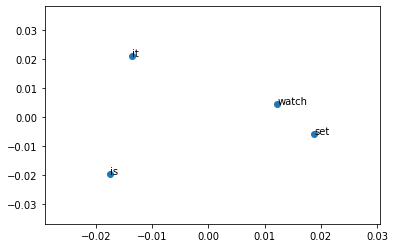

In [62]:
X = SG_model[['it', 'watch', 'set' , 'is']]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = ['it', 'watch', 'set' , 'is']
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

**References:**

[1] https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html

[2] https://web.stanford.edu/class/cs276/handouts/lecture2-dictionary-handout-6-per.pdf

[3] https://en.wikipedia.org/wiki/Lemmatisation

[4] https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

[5] https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

[6] https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

[7] [Efficient Estimation of Word Representations in Vector Space, Tomas Mikolov et. all, 2013.](https://arxiv.org/pdf/1301.3781.pdf)

You can check out more details about *Word2Vec* in [this](https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281) page.